<a href="https://colab.research.google.com/github/Devaadharsini/Data-Science-Internship/blob/main/task_4_ds_intern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*TASK 4*

*Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.*

In [145]:
!pip install tensorflow

In [218]:
import pandas as pd
import numpy as np
import re
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout,SpatialDropout1D,SimpleRNN,LSTM
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

**LOADED TWITTER SENTIMENT ANALYSIS TRAINING DATASET**

In [147]:
train_data=pd.read_csv('twitter_training.csv')
train_data.head()

,tweet_id,entity,sentiment,tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


**EXPLORATORY DATA ANALYSIS**

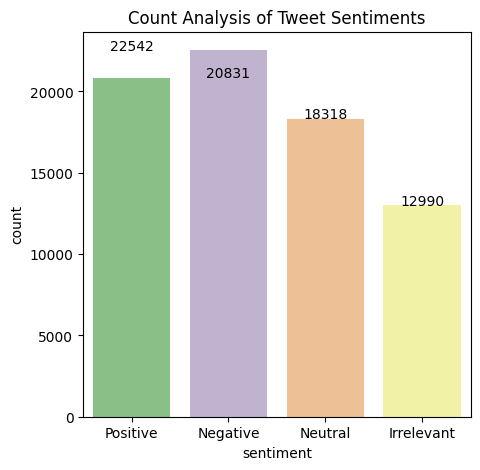

In [222]:
df=pd.read_csv('twitter_training.csv')
counts_sentiment=df['sentiment'].value_counts()
plt.figure(figsize=[5,5])
sns.countplot(x=df['sentiment'],palette='Accent',order=['Positive','Negative','Neutral','Irrelevant'])
plt.title('Count Analysis of Tweet Sentiments')
for index,Counts in enumerate(counts_sentiment):
  plt.text(index,Counts,str(Counts),color='black',va='baseline',ha='center')
plt.show()

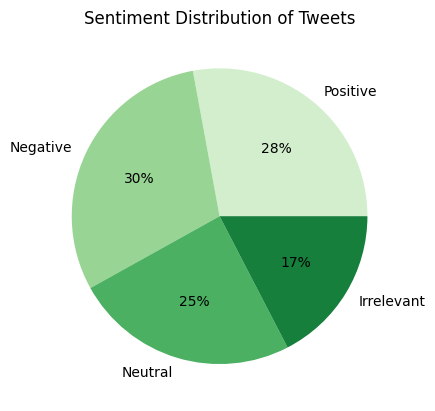

In [224]:
values=df['sentiment'].value_counts()
senti_labels=['Positive','Negative','Neutral','Irrelevant']

ordered_val=[values.get(i,0)for i in senti_labels]
pie_palette=sns.color_palette('Greens',len(senti_labels))
plt.pie(ordered_val,labels=senti_labels,colors=pie_palette,autopct='%.0f%%')
plt.title('Sentiment Distribution of Tweets')
plt.show()

**REQUIRED VARIABLES**

In [153]:
train_data=train_data[['tweet_content','sentiment']]


**SHAPE OF TRAINING DATASET**

In [154]:
print('Shape of train dataset: ',train_data.shape)


Shape of train dataset:  (74681, 2)


**DROPPING NULL VALUES**

In [155]:
train_data=train_data.dropna()


**SHAPE OF TRAINING DATASET AFTER DROPPING NULL VALUES**

In [156]:
print('Shape of train dataset: ',train_data.shape)

Shape of train dataset:  (73995, 2)


In [157]:
print('Train dataset','\n')

print(train_data.head())


Train dataset 

                                       tweet_content sentiment
0  I am coming to the borders and I will kill you...  Positive
1  im getting on borderlands and i will kill you ...  Positive
2  im coming on borderlands and i will murder you...  Positive
3  im getting on borderlands 2 and i will murder ...  Positive
4  im getting into borderlands and i can murder y...  Positive


**COUNT OF SENTIMENTS IN TRANING AND VALIDATION DATASET**

In [158]:
print('Counts of Sentiments in train dataset','\n')

print(train_data['sentiment'].value_counts(),'\n')


Counts of Sentiments in train dataset 

sentiment
Negative      22358
Positive      20654
Neutral       18108
Irrelevant    12875
Name: count, dtype: int64 



**REMOVING 'irrelevant' LABELLED SENTIMENT**

In [159]:
train_data=train_data[train_data['sentiment'] != 'Irrelevant']


In [160]:
print('counts of sentiments in train dataset after removing "Irrelevant" value','\n')
print(train_data['sentiment'].value_counts(),'\n')



counts of sentiments in train dataset after removing "Irrelevant" value 

sentiment
Negative    22358
Positive    20654
Neutral     18108
Name: count, dtype: int64 



**SHAPE OF TRAIN DATASET AFTER REMOVING 'irrelevant' LABELLED SENTIMENTS**

In [161]:
print('Shape of train dataset: ',train_data.shape)


Shape of train dataset:  (61120, 2)


**CONVERTING TWEETS INTO LOWERCASE, REMOVING EXTRA SPACES AND PUNCTUATION**

In [162]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

train_data['tweet_content'] = train_data['tweet_content'].apply(preprocess_text)


**APPLYING TOKENIZATION, SEQUENCING, AND PADDING PREPROCESSING TECHNIQUES ON TWEETS**

In [163]:
# Tokenize the text
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data['tweet_content'])

X= tokenizer.texts_to_sequences(train_data['tweet_content'])

X= pad_sequences(X, maxlen=max_len)


**ENCODING SENTIMENTS**

In [164]:
# Encode the labels
encoder = LabelEncoder()
Y= encoder.fit_transform(train_data['sentiment'])

# Convert labels to categorical one-hot encoding
Y = to_categorical(Y, num_classes=3)


In [166]:
print(X)


print(Y)


[[   0    0    0 ...  434   14   26]
 [   0    0    0 ...  434   14   26]
 [   0    0    0 ... 1674   14   26]
 ...
 [   0    0    0 ...  160  986 2485]
 [   0    0    0 ...   71  161 2485]
 [   0    0    0 ...    2  986 2485]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


**SPLITTING DATASET INTO TRAIN AND TEST**

In [167]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(48896, 100) (48896, 3)
(12224, 100) (12224, 3)


**BUILDING GRU MODEL FOR SENTIMENT ANALYSIS**

In [168]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(GRU(units=128,recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [169]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 128)          640000    
                                                                 
 spatial_dropout1d_7 (Spati  (None, 100, 128)          0         
 alDropout1D)                                                    
                                                                 
 gru_4 (GRU)                 (None, 128)               99072     
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 3)                 387       
                                                                 
Total params: 739459 (2.82 MB)
Trainable params: 739459 (2.82 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

**TRAINING THE GRU MODEL**

In [170]:
history = model.fit(X_train,Y_train, epochs=3, batch_size=128,validation_data=(X_test, Y_test),verbose = 2)


Epoch 1/3
382/382 - 257s - loss: 0.7731 - accuracy: 0.6558 - val_loss: 0.6221 - val_accuracy: 0.7415 - 257s/epoch - 673ms/step
Epoch 2/3
382/382 - 241s - loss: 0.5238 - accuracy: 0.7881 - val_loss: 0.5226 - val_accuracy: 0.7882 - 241s/epoch - 630ms/step
Epoch 3/3
382/382 - 248s - loss: 0.4146 - accuracy: 0.8374 - val_loss: 0.4824 - val_accuracy: 0.8114 - 248s/epoch - 649ms/step


**EVALUATION OF GRU MODEL**

In [172]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(Y_test, axis=1)

382/382 [==============================] - 14s 37ms/step


**VISUALIZING ACCURACY AND LOSS OF GRU**

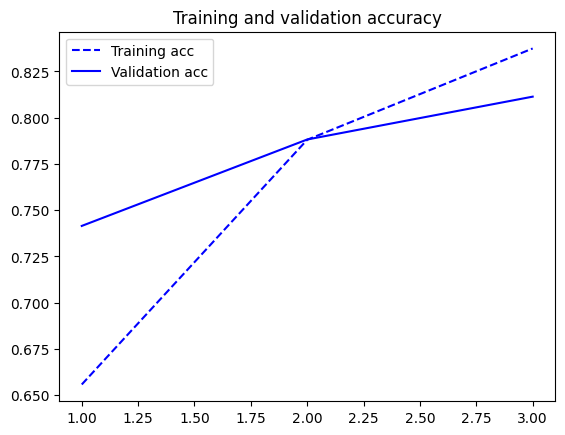

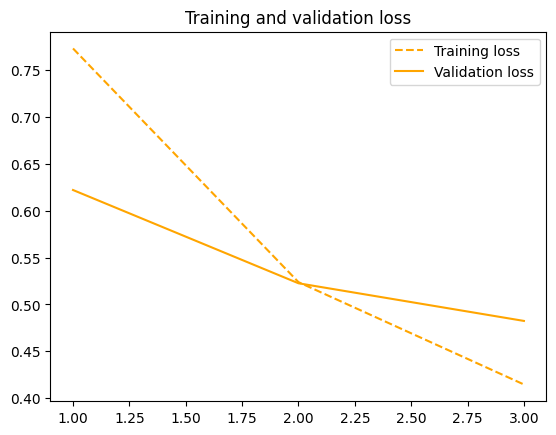

In [207]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc',linestyle='dashed')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'orange', label='Training loss',ls='dashed')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**CLASSIFICATION REPORT OF GRU**

In [184]:
print(classification_report(y_test_classes, y_pred_classes))
print(f"Accuracy: {accuracy_score(y_test_classes, y_pred_classes)}")

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      4444
           1       0.79      0.77      0.78      3679
           2       0.85      0.77      0.81      4101

    accuracy                           0.81     12224
   macro avg       0.81      0.81      0.81     12224
weighted avg       0.81      0.81      0.81     12224

Accuracy: 0.8113547120418848


#*COMPARING GRU PERFORMANCE WITH SimpleRNN*#






**BUILDING SimpleRNN MODEL FOR SENTIMENT ANALYSIS**

In [179]:
model_1 = Sequential()
model_1.add(Embedding(input_dim=max_words, output_dim=128, input_length=X_train.shape[1]))
model_1.add(SpatialDropout1D(0.2))
model_1.add(SimpleRNN(units=128,recurrent_dropout=0.2))
model_1.add(Dropout(0.2))
model_1.add(Dense(3, activation='softmax'))

In [180]:
model_1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 100, 128)          640000    
                                                                 
 spatial_dropout1d_9 (Spati  (None, 100, 128)          0         
 alDropout1D)                                                    
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 128)               32896     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 3)                 387       
                                                                 
Total params: 673283 (2.57 MB)
Trainable params: 673283 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

**TRAINING THE SimpleRNN MODEL**

In [181]:
history_1= model_1.fit(X_train, Y_train, epochs=3, batch_size=128,validation_data=(X_test,Y_test),verbose=2)


Epoch 1/3
382/382 - 64s - loss: 0.9674 - accuracy: 0.5157 - val_loss: 0.7194 - val_accuracy: 0.6932 - 64s/epoch - 167ms/step
Epoch 2/3
382/382 - 62s - loss: 0.6833 - accuracy: 0.7149 - val_loss: 0.6645 - val_accuracy: 0.7330 - 62s/epoch - 162ms/step
Epoch 3/3
382/382 - 72s - loss: 0.5653 - accuracy: 0.7699 - val_loss: 0.5820 - val_accuracy: 0.7651 - 72s/epoch - 189ms/step


**EVALUATION OF SimpleRNN MODEL**

In [185]:
y_pred_1= model_1.predict(X_test)
y_pred_classes_1= np.argmax(y_pred_1, axis=1)
y_test_classes_1= np.argmax(Y_test, axis=1)

382/382 [==============================] - 5s 12ms/step


**VISUALIZING ACCURACY AND LOSS OF RNN**

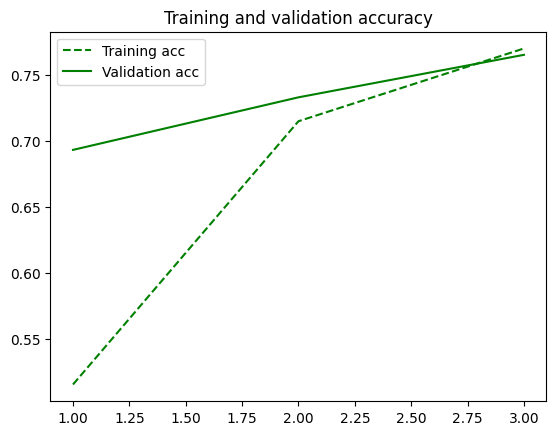

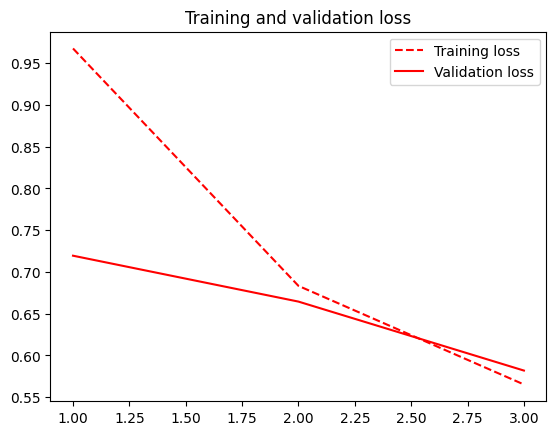

In [206]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'g', label='Training acc',linestyle='dashed')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss',ls='dashed')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**CLASSIFICATION REPORT OF SimpleRNN**

In [199]:
print(classification_report(y_test_classes_1, y_pred_classes_1))
print(f"Accuracy: {accuracy_score(y_test_classes_1, y_pred_classes_1)}")

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      4444
           1       0.75      0.68      0.71      3679
           2       0.73      0.81      0.77      4101

    accuracy                           0.77     12224
   macro avg       0.76      0.76      0.76     12224
weighted avg       0.77      0.77      0.76     12224

Accuracy: 0.7651341623036649


#*COMPARING GRU PERFORMANCE WITH LSTM*#






**BUILDING LSTM MODEL FOR SENTIMENT ANALYSIS**

In [193]:
model_2 = Sequential()
model_2.add(Embedding(input_dim=max_words, output_dim=128, input_length=X_train.shape[1]))
model_2.add(SpatialDropout1D(0.2))
model_2.add(LSTM(units=128,recurrent_dropout=0.2))
model_2.add(Dropout(0.2))
model_2.add(Dense(3, activation='softmax'))

In [194]:
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 100, 128)          640000    
                                                                 
 spatial_dropout1d_12 (Spat  (None, 100, 128)          0         
 ialDropout1D)                                                   
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 3)                 387       
                                                                 
Total params: 771971 (2.94 MB)
Trainable params: 771971 (2.94 MB)
Non-trainable params: 0 (0.00 Byte)
_________________

**TRAINING THE LSTM MODEL**

In [195]:
history_2=model_2.fit(X_train, Y_train, epochs = 3, batch_size=128, validation_data=(X_test, Y_test),verbose = 2)


Epoch 1/3
382/382 - 279s - loss: 0.7686 - accuracy: 0.6605 - val_loss: 0.6182 - val_accuracy: 0.7417 - 279s/epoch - 729ms/step
Epoch 2/3
382/382 - 279s - loss: 0.5210 - accuracy: 0.7908 - val_loss: 0.5092 - val_accuracy: 0.7951 - 279s/epoch - 731ms/step
Epoch 3/3
382/382 - 337s - loss: 0.4089 - accuracy: 0.8360 - val_loss: 0.4629 - val_accuracy: 0.8153 - 337s/epoch - 883ms/step


**EVALUATION OF LSTM MODEL**

In [196]:
y_pred_2= model_2.predict(X_test)
y_pred_classes_2= np.argmax(y_pred_2, axis=1)
y_test_classes_2= np.argmax(Y_test, axis=1)

382/382 [==============================] - 19s 50ms/step


**VISUALIZING ACCURACY AND LOSS OF LSTM**

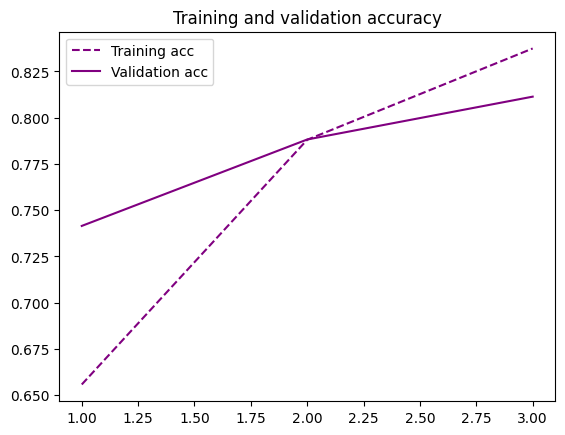

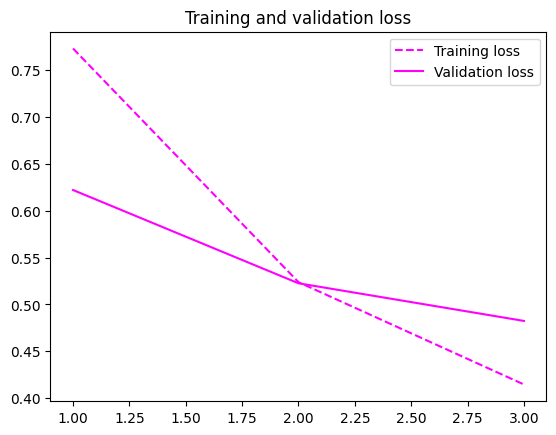

In [212]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'purple', label='Training acc',ls='dashed')
plt.plot(epochs, val_acc, 'purple', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'magenta', label='Training loss',ls='dashed')
plt.plot(epochs, val_loss, 'magenta', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

**CLASSIFICATION REPORT OF LSTM**

In [197]:
print(classification_report(y_test_classes_2, y_pred_classes_2))
print(f"Accuracy: {accuracy_score(y_test_classes_2, y_pred_classes_2)}")

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      4444
           1       0.80      0.77      0.78      3679
           2       0.81      0.82      0.81      4101

    accuracy                           0.82     12224
   macro avg       0.81      0.81      0.81     12224
weighted avg       0.82      0.82      0.82     12224

Accuracy: 0.8152814136125655


#**CONCLUSION**#

*LOSS and ACCURACY*


**LSTM ACHIEVED LOWEST LOSS VALUE & HIGHEST ACCURACY THAN GRU AND SimpleRNN**


